# Exercise 4: Regression

---
**Written by Hendi Lie (h2.lie@qut.edu.au) and Richi Nayak (r.nayak@qut.edu.au). All rights reserved.**

Welcome to the fourth practical exercise for IFN645. Each exercise sheet contains a number of theoretical and programming exercises, designed to strengthen both conceptual and practical understanding of data mining processes in this unit.

To answer conceptual questions, write the answer to each question on a paper/note with your reasoning. For programming exercises, open your iPython console/Jupyter notebook and use Python commands/libraries introduced in each practical to answer the questions. In many cases, you will need to write code to support your conceptual answers.

## 0. Prequisite

Perform the following steps before trying the exercises:
1. Import pandas as "pd" and load the house price dataset into "df".
2. Print dataset information to refresh your memory.
3. Run `preprocess_data` function on the dataframe to perform preprocessing steps discussed last week.
4. Split your data into training and test with 70:30 distribution, stratified, random state 0.

In [1]:
# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from exercise_dm_tools import preprocess_data

# read the dataset
df = pd.read_csv('datasets/melbourne_house_price.csv', index_col=0)

# print data info
print(df.info())

# preprocess data
df_prep = preprocess_data(df)

# split into training and test
rs = 0
X = df_prep.drop(['Price_above_median'], axis=1)
y = df_prep['Price_above_median']

X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 22 columns):
Suburb                24197 non-null object
Address               24197 non-null object
Rooms                 24197 non-null int64
Type                  24197 non-null object
Price                 24197 non-null float64
Method                24197 non-null object
SellerG               24197 non-null object
Date                  24197 non-null object
Distance              24196 non-null float64
Postcode              24196 non-null float64
Bedroom2              18673 non-null float64
Bathroom              18669 non-null float64
Car                   18394 non-null float64
Landsize              15946 non-null float64
BuildingArea          9609 non-null float64
YearBuilt             10961 non-null float64
CouncilArea           24194 non-null object
Lattitude             18843 non-null float64
Longtitude            18843 non-null float64
Regionname            24194 non-null object
Pr

## 1. Standardisation and Logistic Regression

Perform following operations and answer the following questions:
1. **What is the difference between logistic regression and linear regression?** Structure-wise, linear and logistic regression is actually quite similar. Both of them build prediction by multiplying features/variables to set of weights. The difference is, logistic regression apply logistic function to transform the continuous output into range of 0.0-1.0 probability of binary class.
2. **Describe how logistic regression perform its prediction.** As above.
3. **Perform standardisation on your training and test dataset.** Code below.
4. **What does standardisation do to your data? How does it benefit your regression model?** Standardisation is a process of scaling input features so they have mean of 0 and standard deviation of 1. The largest benefit of standardisation for regression models is ensuring gradient descent updates weights on similar speed. In addition, standardised input features allow us to compare their regression weights and figure out the important variables.
5. **(Bonus) Why do you think we should fit standardisation model (learn the mean and std.devs) on training data instead of all data (training + test)?** Recall what **test** data is. Test data is supposed to mimic input data supplied to model during production/application environment, which the model should have no information of. Therefore, all parts of a data mining system, including preprocessing and standardisation, should not be fitted/learned on test data.
6. **Fit a logistic regression model to your training data. How does it perform on the training and test data? Do you see any indication of overfitting?** Code below.
7. **Use GridSearchCV to tune parameter of your model. What is the performance of the model now?** Code below.
8. **What is the most important features in your model?** Code below.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # don't fit this

# first logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # fit

print("Training accuracy:", logreg.score(X_train, y_train))
print("Test accuracy:", logreg.score(X_test, y_test))

C:\Users\lieh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Training accuracy: 0.8916445231768527
Test accuracy: 0.882215181154429


Relatively good training and test accuracy, not much indication of overfitting.

In [3]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8918807204015353
Test accuracy: 0.8823529411764706
             precision    recall  f1-score   support

          0       0.88      0.88      0.88      3634
          1       0.88      0.88      0.88      3625

avg / total       0.88      0.88      0.88      7259

{'C': 0.1}


In [4]:
# most important features
import numpy as np

coef = cv.best_estimator_.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

Distance : -1.6104825368973748
Rooms : 1.4061878103887586
Type_u : -0.9303045526543254
Type_h : 0.8737670214675293
CouncilArea_Hume City Council : -0.43502957341027065
Regionname_Southern Metropolitan : 0.4187170603501341
CouncilArea_Brimbank City Council : -0.371242073246252
Regionname_Western Metropolitan : -0.34492547276666813
Bathroom : 0.3109424320098371
CouncilArea_Wyndham City Council : -0.30221770269497644
Car : 0.30113551101609626
CouncilArea_Bayside City Council : 0.3002845157429261
CouncilArea_Whittlesea City Council : -0.2962985224282615
Suburb_Heidelberg West : -0.29416054367211053
Suburb_Sunshine West : -0.2874603881761809
Suburb_Glen Waverley : 0.28568038280142266
Suburb_Meadow Heights : -0.28013901983687944
Suburb_Melton : -0.279102456203443
CouncilArea_Melton City Council : -0.25298769682501937
Suburb_Reservoir : -0.25043609905279884


Distance (from CBD), room count and type of house come out as the most important features

## 2. Input Transformation

Perform the following operations and answer the question.
1. **Find two features/variables with skewness. How could you fix this problem?** Visualise the dataset using distplot like code as below. There are a number of variables with skewness, but we can only apply transformation into rooms, distance, bathroom and car. We will transform all four of them using code as below.
2. **How does recursive feature elimination works?** RFE works by first training the model on all features. Each feature then will be assigned an weight, and features with smallest weight (less important) is eliminated, making a smaller feature set. This process is repeated a number of times until reaching the optimal performance.
3. **Build a decision tree model and use "select from model" as the feature selection method. How many features are left in the training data? Does the feature reduction step improve performance of the model?** Code as below.

### 2.1. Feature transformation

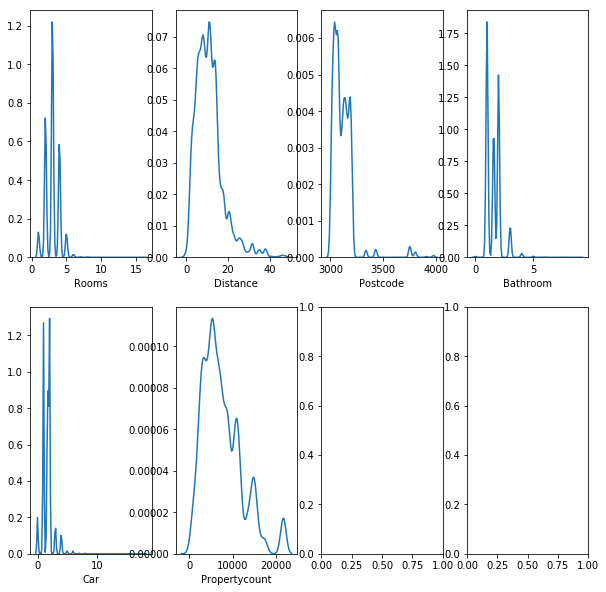

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# get columns from X
cols = X.columns

# filter out columns with '_' in their name, as '_' indicate one-hot encoded binary variables
cols = [col for col in cols if '_' not in col]

# discard latitude and longitude
cols.remove('Lattitude')
cols.remove('Longtitude')

# visualise the columns
fig, ax = plt.subplots(2,4, figsize=(10,10), sharex=False)

# draw distplots on each inspected column in X
for i, col in enumerate(cols):
    sns.distplot(X[col].dropna(), hist=False, ax=ax[int(i/4)][i%4])
    
plt.show()

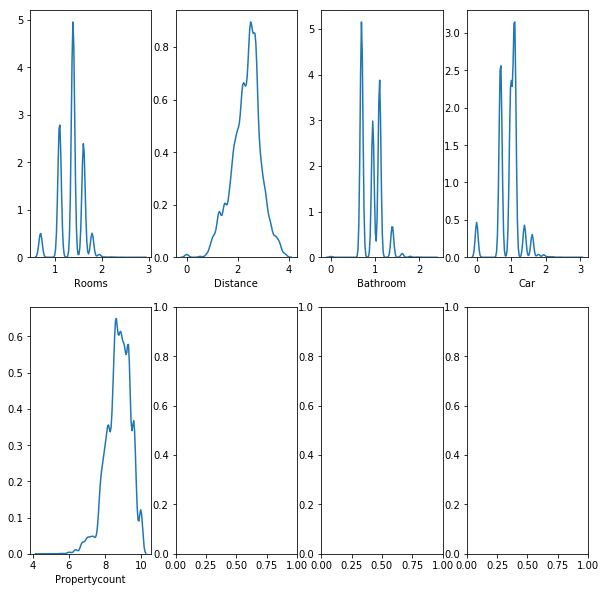

C:\Users\lieh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train accuracy: 0.8908178328904636
Test accuracy: 0.882215181154429
             precision    recall  f1-score   support

          0       0.88      0.88      0.88      3634
          1       0.88      0.88      0.88      3625

avg / total       0.88      0.88      0.88      7259

{'C': 0.1}
Rooms : 1.4459058265962286
Distance : -1.0572324866454121
Type_u : -0.9309355086896263
Type_h : 0.8837869923276146
Regionname_Southern Metropolitan : 0.48056518461563624
CouncilArea_Hume City Council : -0.46320412437783987
CouncilArea_Brimbank City Council : -0.35742707289888864
CouncilArea_Whittlesea City Council : -0.33868867995724744
CouncilArea_Wyndham City Council : -0.3373813085211614
Regionname_Western Metropolitan : -0.32869929609136783
Bathroom : 0.30243652169125274
CouncilArea_Bayside City Council : 0.29698388212537624
Suburb_Hoppers Crossing : -0.2669618234373642
CouncilArea_Melton City Council : -0.26621010257542993
Suburb_Heidelberg West : -0.2656642985938633
Suburb_Reservoir : -0.264

In [23]:
# list columns to be transformed
columns_to_transform = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Propertycount']

# copy the dataframe
X_log = X.copy()

# transform the columns with np.log
for col in columns_to_transform:
    X_log[col] = X_log[col].apply(lambda x: x+1)
    X_log[col] = X_log[col].apply(np.log)

# plot them again to show the distribution
fig, ax = plt.subplots(2,4, figsize=(10,10), sharex=False)
for i, col in enumerate(columns_to_transform):
    sns.distplot(X_log[col].dropna(), hist=False, ax=ax[int(i/4)][i%4])
    
plt.show()


# test if it improves prediction quality

# start by splitting them again
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y, test_size=0.3, stratify=y, random_state=rs)

# scale
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# grid search
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred_log = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

# best features
coef = cv.best_estimator_.coef_[0]
feature_names = X_log.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

Does not improve the accuracy that much, apparently. The important features are also quite similar.

### 2.3. Selection from decision tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier

# similar parameters with the last practical exercise
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(200, 600, 100)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)

print(cv.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 200}


In [26]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

print(X_train_sel_model.shape)

(16935, 10)


In [27]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train_log)

print("Train accuracy:", cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_model, y_test_log))

# test the best model
y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8461175081192795
Test accuracy: 0.8473618955779033
             precision    recall  f1-score   support

          0       0.84      0.86      0.85      3634
          1       0.85      0.84      0.85      3625

avg / total       0.85      0.85      0.85      7259

{'C': 1}


Unfortunately, feature reduction with decision tree does not result in improved performance of the model. Maybe something else can work? It is up to you to figure out.